In [1]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as hcluster
import heapq
from sklearn.cluster import KMeans

Я использовал модель ruscorpora_upos_cbow_300_20_2019

In [2]:
with open ("/Users/mak/Downloads/180/model.txt", 'r') as f:
    model = gensim.models.KeyedVectors.load_word2vec_format(f, binary = False)

In [3]:
with open("Lonshakov.txt", 'r', encoding='utf-8') as f:
    pairs = f.readlines()

In [4]:
verb = pairs[0].split('_')[0] + '_VERB'
nouns = []
cleaned_pairs = []
for pair in pairs:
    pair = pair.split('\t')[0]
    cleaned_pairs.append(pair)
for words in cleaned_pairs:
    noun = words.split('_')[1]
    nouns.append(noun + '_NOUN')

In [5]:
phrases = []    # phrases – список векторов словосочетаний из списка
for noun in nouns:
    phrases.append(model[verb] + model[noun])

In [6]:
array = []
for phrase in phrases:
    vector = []
    for item in phrase:
        vector.append(float(item))
    array.append(vector)

In [7]:
X = np.array(array)
print (X.shape)

(100, 300)


## Иерархическая кластеризация

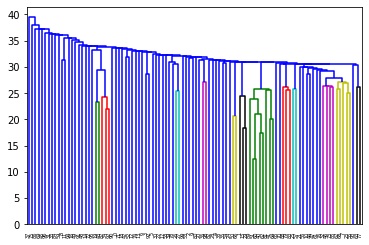

In [8]:
Z = hcluster.linkage(X)
plt.figure()
dn = hcluster.dendrogram(Z)
plt.show()

In [9]:
clusters = hcluster.fcluster(Z, t=0.9)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 66


Для данной задачи задавать параметр t имеет смысл в промежутке от 0.71 до 1.14 (иначе выходит либо всего 1 кластер, либо 0 кластеров, содержащих более 2-х элементов). Я задал t = 0.9, так как в таком случае получилась более осмысленная кластеризация. Иначе, например, при t = 1, один из кластеров сложно интерпретировать из-за размера (46 элементов) и теряются другие выделяющиеся кластеры (в сравнении с t=0.9).

In [10]:
clusters_hier = [[] for i in range(len(set(clusters)))]
for i, j in enumerate(clusters):
    clusters_hier[j-1].append(cleaned_pairs[i])

In [11]:
more_two_clusters = []
more_two = 0
for cluster in clusters_hier:
    if len(cluster) > 2:
        more_two += 1
        more_two_clusters.append(cluster)

In [12]:
vectors_hier = [[] for i in range(len(set(clusters)))]
for i, j in enumerate(clusters): 
    vectors_hier[j-1].append(np.array(X[i]))

In [13]:
dist_from_centroid = [[] for i in range(len(more_two_clusters))]

more_two = 0
for cluster in vectors_hier:
    if len(cluster) > 2:
        for phrase in cluster:
            dist_from_centroid[more_two].append(scipy.spatial.distance.cosine(np.mean(cluster), phrase))
        more_two += 1

In [14]:
hier_clusters_with_three_elem = []
i = 0
for cluster in dist_from_centroid:
    temp_list = []
    closest_three = heapq.nlargest(3, cluster)
    for elem in closest_three:
        temp_list.append(more_two_clusters[i][cluster.index(elem)])
    hier_clusters_with_three_elem.append(temp_list)
    i += 1

In [15]:
for i, j in enumerate(hier_clusters_with_three_elem):
    print("Кластер № %d " % (i+1) + str(j))

Кластер № 1 ['найти_книга', 'найти_книжка', 'найти_рукопись']
Кластер № 2 ['найти_помещение', 'найти_квартира', 'найти_дом']
Кластер № 3 ['найти_ключ', 'найти_золото', 'найти_клад']
Кластер № 4 ['найти_способ', 'найти_средства', 'найти_средство']
Кластер № 5 ['найти_невеста', 'найти_девушка', 'найти_женщина']
Кластер № 6 ['найти_анализ', 'найти_подход', 'найти_понимание']
Кластер № 7 ['найти_покой', 'найти_успокоение', 'найти_счастие']
Кластер № 8 ['найти_объяснение', 'найти_ответ', 'найти_истина']
Кластер № 9 ['найти_желание', 'найти_невозможность', 'найти_стремление']


## К-средние

In [16]:
kmeans = KMeans(n_clusters=41).fit(X)
clusters = kmeans.labels_

Наверное, выбор числа кластеров зависит от задачи, которая стоит перед исследователем. Если интересно посмотреть на значения глагола, то много кластеров задавать не стоит, если же интересно распределение типов объектов в каждом или в каких-нибудь из значений, то число кластеров можно задать побольше. Однако нужно выбирать наиболее оптимальное число в обоих из случаев (видимо перебором), так как слишком маленькое число кластеров либо слишком большое число дадут сложноинтерпретируемые или вовсе не интерпретируемые результаты.

In [17]:
clusters_hier = [[] for i in range(len(set(clusters)))]
for i, j in enumerate(clusters):
    clusters_hier[j-1].append(cleaned_pairs[i])

In [18]:
more_two_clusters = []
more_two = 0
for cluster in clusters_hier:
    if len(cluster) > 2:
        more_two += 1
        more_two_clusters.append(cluster)

In [19]:
vectors_hier = [[] for i in range(len(set(clusters)))]
for i, j in enumerate(clusters): 
    vectors_hier[j-1].append(np.array(X[i]))

In [20]:
dist_from_centroid = [[] for i in range(len(more_two_clusters))]

more_two = 0
for cluster in vectors_hier:
    if len(cluster) > 2:
        for phrase in cluster:
            dist_from_centroid[more_two].append(scipy.spatial.distance.cosine(np.mean(cluster), phrase))
        more_two += 1

In [21]:
kmean_clusters_with_three_elem = []
i = 0
for cluster in dist_from_centroid:
    temp_list = []
    closest_three = heapq.nlargest(3, cluster)
    for elem in closest_three:
        temp_list.append(more_two_clusters[i][cluster.index(elem)])
    kmean_clusters_with_three_elem.append(temp_list)
    i += 1

In [22]:
for i, j in enumerate(kmean_clusters_with_three_elem):
    print("Кластер № %d " % (i+1) + str(j))

Кластер № 1 ['найти_мама', 'найти_отец', 'найти_мать']
Кластер № 2 ['найти_отражение', 'найти_подтверждение', 'найти_отклик']
Кластер № 3 ['найти_ключ', 'найти_золото', 'найти_клад']
Кластер № 4 ['найти_место', 'найти_время', 'найти_день']
Кластер № 5 ['найти_возможность', 'найти_случай', 'найти_невозможность']
Кластер № 6 ['найти_книга', 'найти_книжка', 'найти_рукопись']
Кластер № 7 ['найти_применение', 'найти_анализ', 'найти_подход']
Кластер № 8 ['найти_невеста', 'найти_девушка', 'найти_жена']
Кластер № 9 ['найти_объяснение', 'найти_предлог', 'найти_ответ']
Кластер № 10 ['найти_помещение', 'найти_квартира', 'найти_дом']
Кластер № 11 ['найти_понимание', 'найти_мысль', 'найти_смысл']
Кластер № 12 ['найти_ученый', 'найти_доктор', 'найти_врач']
Кластер № 13 ['найти_способ', 'найти_защита', 'найти_средства']
Кластер № 14 ['найти_приют', 'найти_убежище', 'найти_спасение']
Кластер № 15 ['найти_желание', 'найти_стремление', 'найти_жизнь']
Кластер № 16 ['найти_человек', 'найти_дурак', 'найти_

### Анализ результатов

Практически все кластеры получились однородными. Не по всем словосочетаниям удается точно понять значение глагола, в некоторых случаях требуется обращение к контексту: например, в кластере ['найти книга', 'найти книжка', 'найти рукопись'] нельзя сказать однозначно, предмет найден в результате поиска или случайно, возможны обе интерпретации. Не все значения глагола удалось поймать, основная трудность здесь, как мне кажется, когда у глагола есть конструкция с тремя обязательными актантами (ср. *Я нахожу ситуацию трудной*). То есть если мы отбираем лишь "глагол + прямой объект", то при подобном анализе такое значение глагола мы скорее упустим.
Метод К-средних более удобен тем, что можно контролировать число кластеров, но, так как в алгоритме первый центроид выбирается рандомно, результаты при каждом запуске алгоритма могут отличаться. Иерархический метод более постоянен, но, по крайней мере в нашей задаче с данными в 100 словосочетаний, он оказался менее пластичен, то есть его возможности показались более ограниченными по сравнению с методом К-средних.